In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cf = pd.read_csv(city_data_to_load)
rf = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
rcf = pd.merge(rf,cf, how = "inner",on = None,)
# Display the data table for preview
rcf.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [3]:
city = rcf.groupby(["type","city"])
avg_fare = city["fare"].mean()
tot_rides = city["ride_id"].nunique()
tot_drivers = (city["driver_count"].unique()).astype(int)

In [4]:
city_type = list(rcf["type"].unique())
num_types = len(city_type)

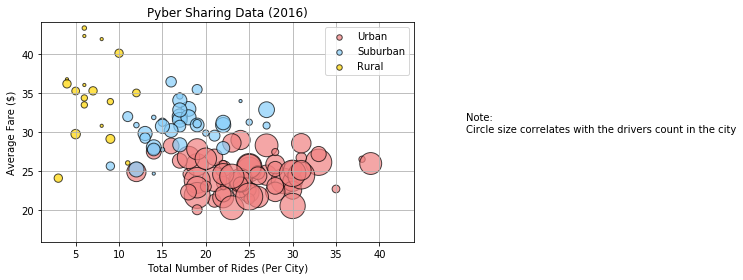

In [5]:
fig,ax = plt.subplots()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Sharing Data (2016)")
plt.grid()
plt.xlim(1, 44)
plt.ylim(16, 44)
colors =['lightcoral','lightskyblue','gold']

for i in range(num_types):
    plt.scatter(tot_rides[city_type[i]], avg_fare[city_type[i]], marker="o", 
                c = colors[i], s = tot_drivers[city_type[i]]*10, edgecolors="black",label = city_type[i],alpha=0.7)
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([30.0])
text = "Note:"+"\nCircle size correlates with the drivers count in the city"
trans = ax.get_xaxis_transform() # x in data untis, y in axes fraction
ann = ax.annotate(text, xy=(50, 0.5 ), xycoords=trans)
ax.grid(True)
plt.tight_layout()
plt.savefig("Pyber_Bubble.png",bbox_inches="tight")
# Show plot
plt.show()

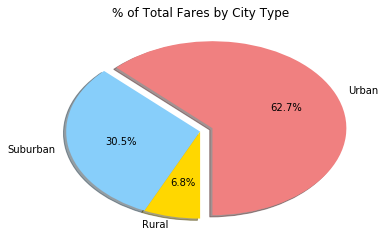

In [6]:
tot_fare = city["fare"].sum()
city_type_fare = []
for i in range(num_types):
    city_type_fare.append(tot_fare[city_type[i]].sum())
label = ["Urban","Suburban","Rural"]
explode = (0.1,0,0)
plt.pie(city_type_fare, explode=explode, labels=label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Fares by City Type")
plt.savefig("Pyber_Pie_Fare.png")

## Total Fares by City Type

In [7]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [8]:
# Show Figure
plt.show()

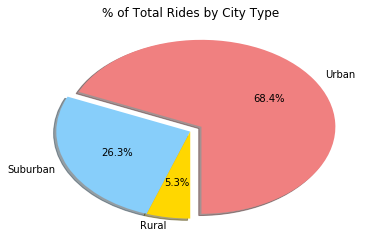

In [9]:
city_type_rides = []
for i in range(num_types):
    city_type_rides.append(tot_rides[city_type[i]].sum())

label = ["Urban","Suburban","Rural"]
explode = (0.1,0,0)
plt.pie(city_type_rides, explode=explode, labels=label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Rides by City Type")
plt.savefig("Pyber_Pie_Rides.png")

## Total Rides by City Type

In [10]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [12]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


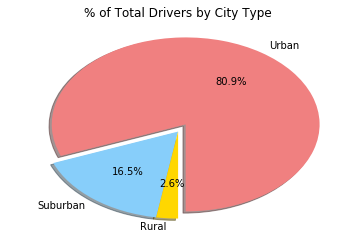

In [13]:
city_type_drivers = []
for i in range(num_types):
    city_type_drivers.append(tot_drivers[city_type[i]].sum())

label = ["Urban","Suburban","Rural"]
explode = (0.1,0,0)
plt.pie(city_type_drivers, explode=explode, labels=label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.title("% of Total Drivers by City Type")
plt.savefig("Pyber_Pie_Drivers.png")
# Show Figure
plt.show()